In [1]:
from google.colab import files
import subprocess
import datetime
import os
import re
import torch


In [2]:
# @title Pointnet code
# installing pointnet++
!pip install ninja
!git clone https://github.com/erikwijmans/Pointnet2_PyTorch
%cd /content/Pointnet2_PyTorch
!python setup.py install

# moving to root directory
%cd ..

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 2.6 MB/s eta 0:00:00
Cloning into 'Pointnet2_PyTorch'...
remote: Enumerating objects: 706, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 706 (delta 0), reused 1 (delta 0), pack-reused 703
Receiving objects: 100% (706/706), 976.27 KiB | 7.34 MiB/s, done.
Resolving deltas: 100% (391/391), done.
/content/Pointnet2_PyTorch
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        *********************************************************

In [3]:
# install minimal requirements (pytorch is already installed in colab)
!pip install timm==0.5.4 wandb tqdm h5py==3.6.0 protobuf==3.20.1 lmdb==1.2.1 msgpack-numpy==0.4.7.1 scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.5/881.5 kB 72.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Created wheel for lmdb: filename=lmdb-1.2.1-cp310-cp310-linux_x86_64.whl size=265652 sha256=e432375d9ecc679f21914c4b53442eb4800fd2d00aa5bfc8e98f76f2e7cd1f08
  Stored in directory: /root/.cache/pip/wheels/ae/36/fc/13e586283759d30c3efc3d0b917b2c5f1b69d171de8b7ed204
Successfully built lmdb
  Attempting uninstal

In [4]:
# @title Knn code

!pip install "https://github.com/unlimblue/KNN_CUDA/releases/download/0.2/KNN_CUDA-0.2-py3-none-any.whl"
!pip install ninja==1.10.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: ninja
    Found existing installation: ninja 1.11.1.1
    Uninstalling ninja-1.11.1.1:
      Successfully uninstalled ninja-1.11.1.1


In [5]:
# @title Openshape code

!pip install torch.redstone einops huggingface_hub
!pip install  dgl -f https://data.dgl.ai/wheels/repo.html
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 929.9 kB/s eta 0:00:00


Looking in links: https://data.dgl.ai/wheels/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 50.7 MB/s eta 0:00:00
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=8bd48b37cba71b1c2d400d4c

In [6]:
# @title PyVista
!apt-get update
!apt-get install -qq xvfb libgl1-mesa-glx
!pip install pyvista -qq

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,463 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,343 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,796 kB]
Hit:13 https://ppa.launchpadcontent

In [7]:
import pyvista

# Seems that only static plotting is supported by colab at the moment
pyvista.global_theme.jupyter_backend = 'static'
pyvista.global_theme.notebook = True
pyvista.start_xvfb()

In [8]:
# @title Semantic novelty code
# made a new repo for you starting from 3DOS with modifications to help you running the code with colab.
%cd /content

### Comment to keep the repo already downloaded
!rm -r /content/SemNov_AML_DAAI_23-24

!git clone https://github.com/paolo-magliano/SemNov_AML_DAAI_23-24


/content
rm: cannot remove '/content/SemNov_AML_DAAI_23-24': No such file or directory
Cloning into 'SemNov_AML_DAAI_23-24'...
remote: Enumerating objects: 705, done.
remote: Counting objects: 100% (465/465), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 705 (delta 339), reused 435 (delta 315), pack-reused 240
Receiving objects: 100% (705/705), 157.34 MiB | 30.85 MiB/s, done.
Resolving deltas: 100% (427/427), done.
Updating files: 100% (165/165), done.


In [9]:
# @title Dataset

### Comment to keep the dataset already downloaded
# !rm -r 3D_OS_release_data

%cd /content

if not os.path.exists(f'3D_OS_release_data'):
    !sh /content/SemNov_AML_DAAI_23-24/download_data.sh

%cd /content/SemNov_AML_DAAI_23-24

/content
============Downloading ModelNet40 + OOD Splits in 
--2024-02-19 19:52:32--  https://www.dropbox.com/s/c2x3h59nxprjs21/modelnet40_normal_resampled.tar?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/c2x3h59nxprjs21/modelnet40_normal_resampled.tar [following]
--2024-02-19 19:52:32--  https://www.dropbox.com/s/dl/c2x3h59nxprjs21/modelnet40_normal_resampled.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2ed85e5530f7cd51fcba7e20e1.dl-eu.dropboxusercontent.com/cd/0/get/CNnN10JNVqUazT9_fqEVLgim_nLMw2XCiMglwGj4DZ2kHX5UeQ0r9V6SPgRDxM0ZYUtqj7KjTv_9RXmok3P0HCVcro1aUr8dIGlMwB_Za29x-ZuDVVxXXH748WNeInTTmijfqnEzfBqpFA0xzTWGG8T0/file?dl=1# [following]
--2024-02-19 19:52:33--  https://uc2ed85e5530f7cd51fcba7e20e1.dl-eu.dropbox

In [10]:
# @title Costant
model = 'pn2-msg' # 'dgcnn-cla' or 'pn2-msg'
src = 'SR1'         # 'SR1' or 'SR2'
loss = 'subcenter_arcface'       # 'CE' or 'subcenter_arcface'
cs = ''         # '' or '--cs'
data_root = '--data_root /content/3D_OS_release_data' # '' or '--data_root /content/3D_OS_release_data'
open_shape = '' # '' or '--open_shape openshape-pointbert-vitg14-rgb'

wandb_api = '64d1b8769f524f18c3c9c53265dbde91917f7cac'

name = f'{model.split("-")[0]}_{loss.split("_")[0]}_{src}'.upper()
config = f'cfgs/{model}.yaml'

print(name)


PN2_SUBCENTER_SR1


In [11]:
def run(command, name=""):
    date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)

    with open(f'/content/output_{name}.txt', 'w') as output_file:
        # Itera sulle linee di output e scrivi ciascuna linea nel file
        for line in process.stdout:
            if not re.search(r'/s]', line) and not re.search(r'/it]', line):
                print(line, end='')  # Stampa l'output sulla console
                output_file.write(line)  # Scrive l'output nel file

    process.wait()

    files.download(f'/content/output_{name}.txt')

In [12]:
# @title Train
%cd /content/SemNov_AML_DAAI_23-24
command = f'torchrun --nproc_per_node=1 /content/SemNov_AML_DAAI_23-24/classifiers/trainer_cla_md.py --config {config} --exp_name {name} --src {src} --loss {loss} {cs} --wandb_api {wandb_api}'

# run(command, f'train_{name}')

# !zip -r {name}.zip /content/SemNov_AML_DAAI_23-24/outputs/{name}
# files.download(f'{name}.zip')

/content/SemNov_AML_DAAI_23-24


In [13]:
# @title Eval
%cd /content/SemNov_AML_DAAI_23-24
command = f'torchrun --nproc_per_node=1 /content/SemNov_AML_DAAI_23-24/classifiers/trainer_cla_md.py --config {config} --exp_name {name} --src {src} --loss {loss} {cs} -mode eval --ckpt_path /content/SemNov_AML_DAAI_23-24/trained_models/{name}.pth {data_root} {open_shape}'
if open_shape != '':
    open_name = open_shape.split(' ')[1].split('-')[0].upper() + '_' + open_shape.split(' ')[1].split('-')[2].upper() + '_' + src
    file_name = f'eval_{open_name}'
else:
    file_name = f'eval_{name}'
print(file_name)
# run(command, file_name)


/content/SemNov_AML_DAAI_23-24
eval_PN2_SUBCENTER_SR1


In [14]:
#!torchrun --nproc_per_node=1 /content/SemNov_AML_DAAI_23-24/points_print.py --config {config} --exp_name {name} --src {src} --loss {loss} {cs} -mode eval --ckpt_path /content/SemNov_AML_DAAI_23-24/trained_models/{name}.pth {data_root} {open_shape}

/content/SemNov_AML_DAAI_23-24
Arguments: 
ModelNet40_OOD - Reading data from h5py file: /content/3D_OS_release_data/modelnet40_normal_resampled/ood_sets_cache/SR1_train.h5
ModelNet40_OOD - split: train, categories: {'chair': 0, 'bookshelf': 1, 'door': 2, 'sink': 3, 'sofa': 4}
SR1 train data len: 2378
ModelNet40_OOD - Reading data from h5py file: /content/3D_OS_release_data/modelnet40_normal_resampled/ood_sets_cache/SR1_test.h5
ModelNet40_OOD - split: test, categories: {'chair': 0, 'bookshelf': 1, 'door': 2, 'sink': 3, 'sofa': 4}
ScanObject - num_points: 2048, sonn_split: main_split, h5_suffix: objectdataset.h5, split: all, class_choice: {4: 0, 8: 1, 7: 2, 12: 3, 13: 4}, num samples: 1255
ScanObject - num_points: 2048, sonn_split: main_split, h5_suffix: objectdataset.h5, split: all, class_choice: {10: 0, 14: 1, 5: 2, 6: 3, 9: 2}, num samples: 788
Load samples
0 Label: display, Points: (2048, 3)


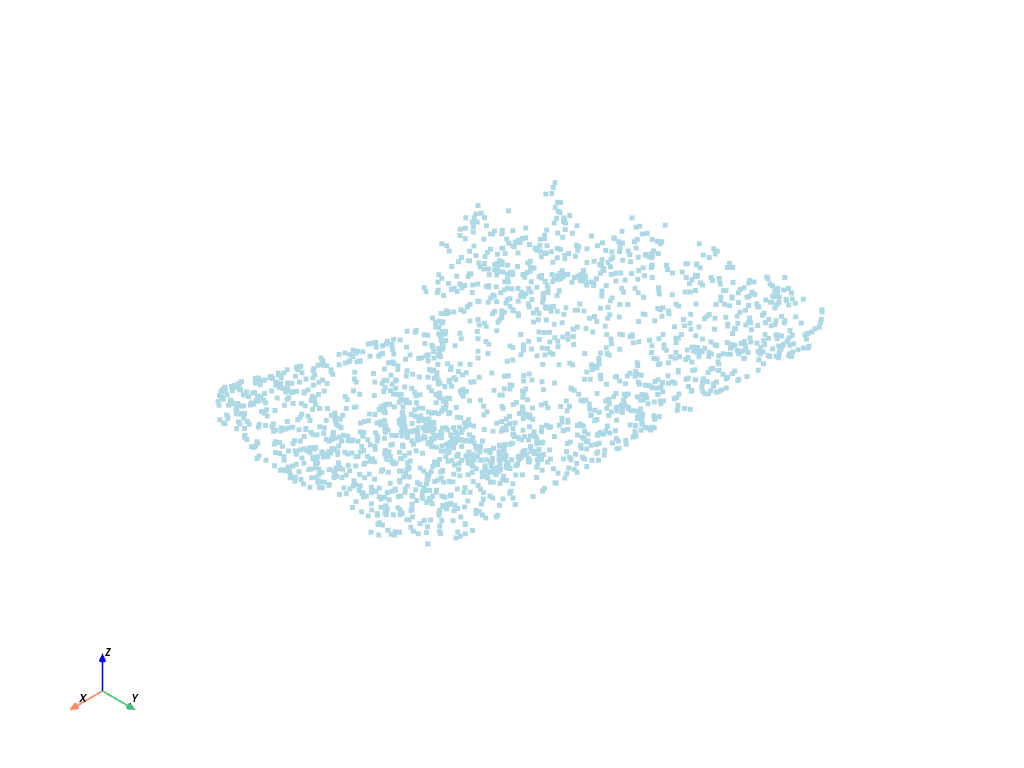

0 Label: display, Points: (2048, 3)


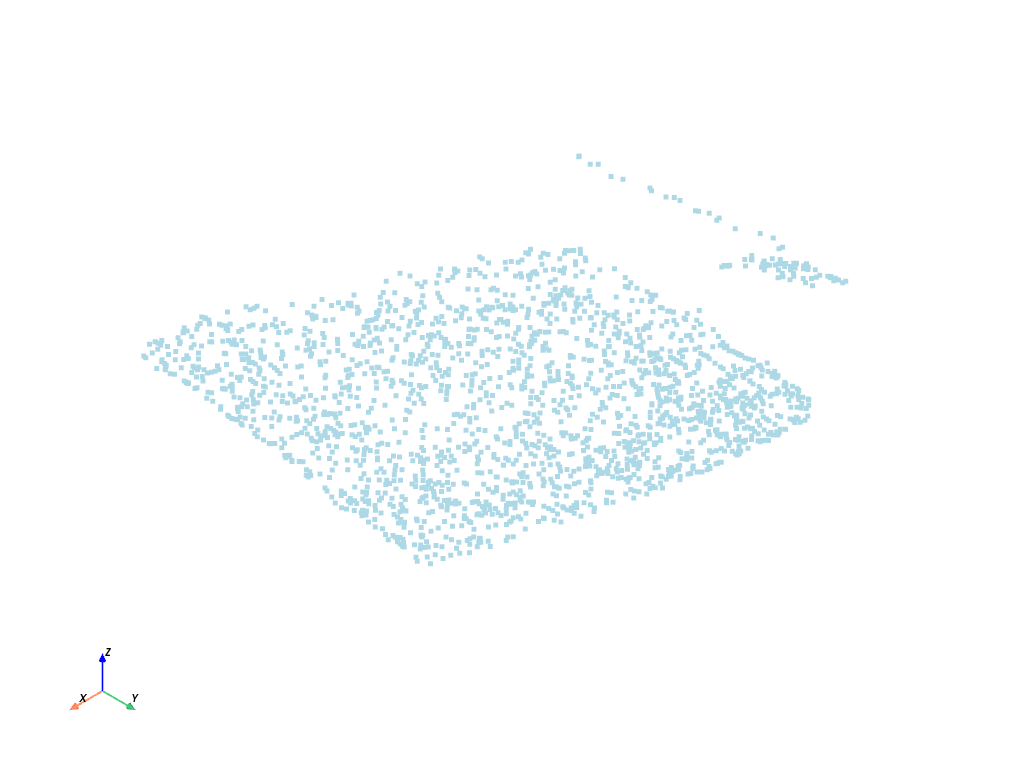

0 Label: bed, Points: (2048, 3)


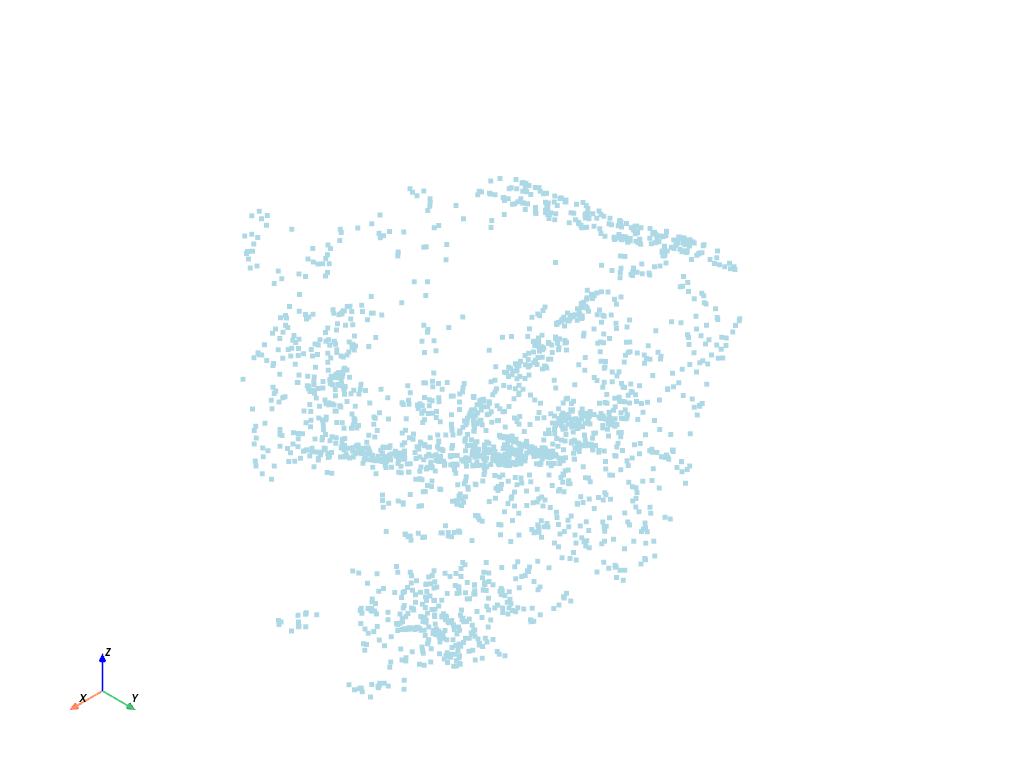

0 Label: desk, Points: (2048, 3)


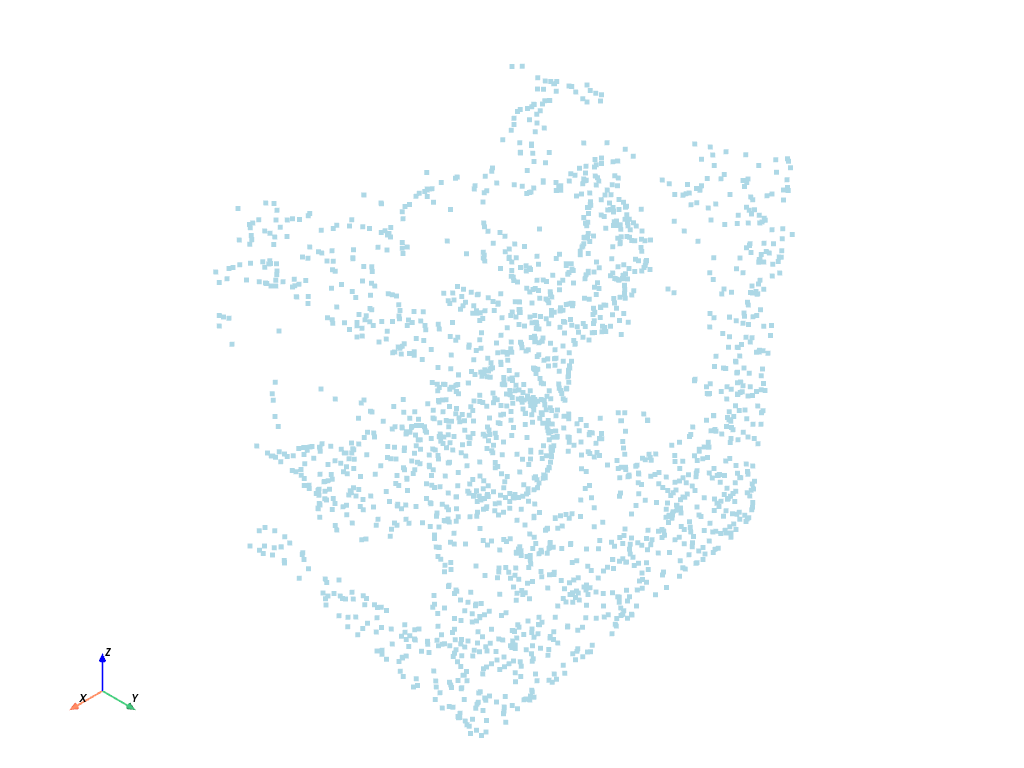

0 Label: desk, Points: (2048, 3)


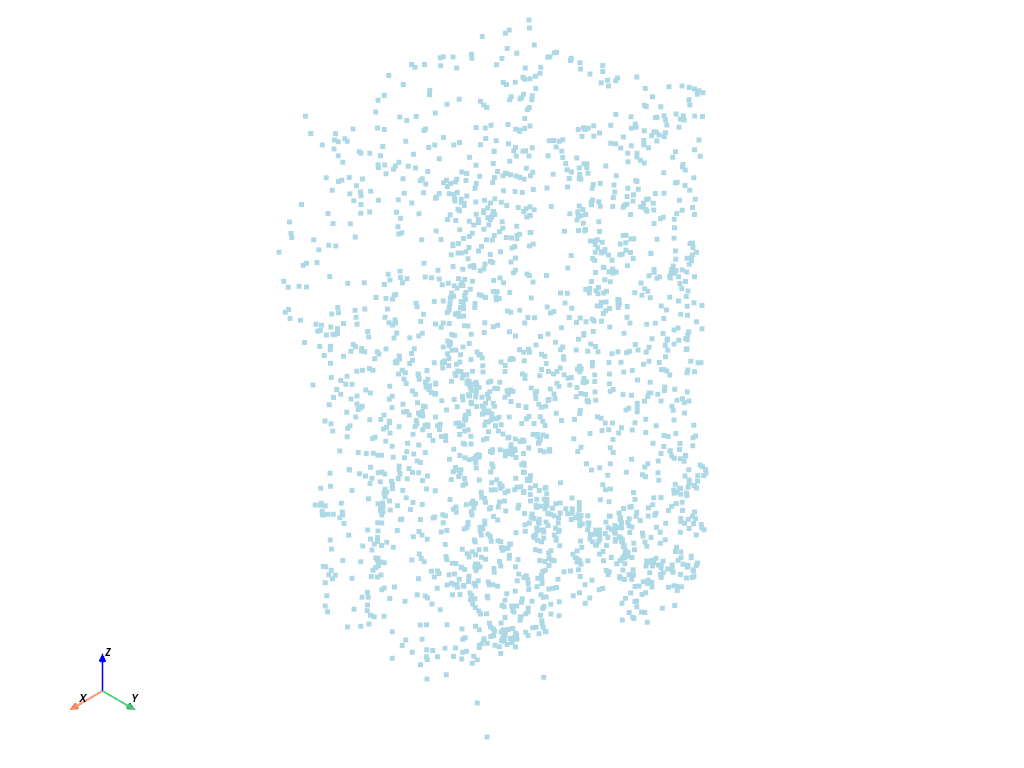

0 Label: desk, Points: (2048, 3)


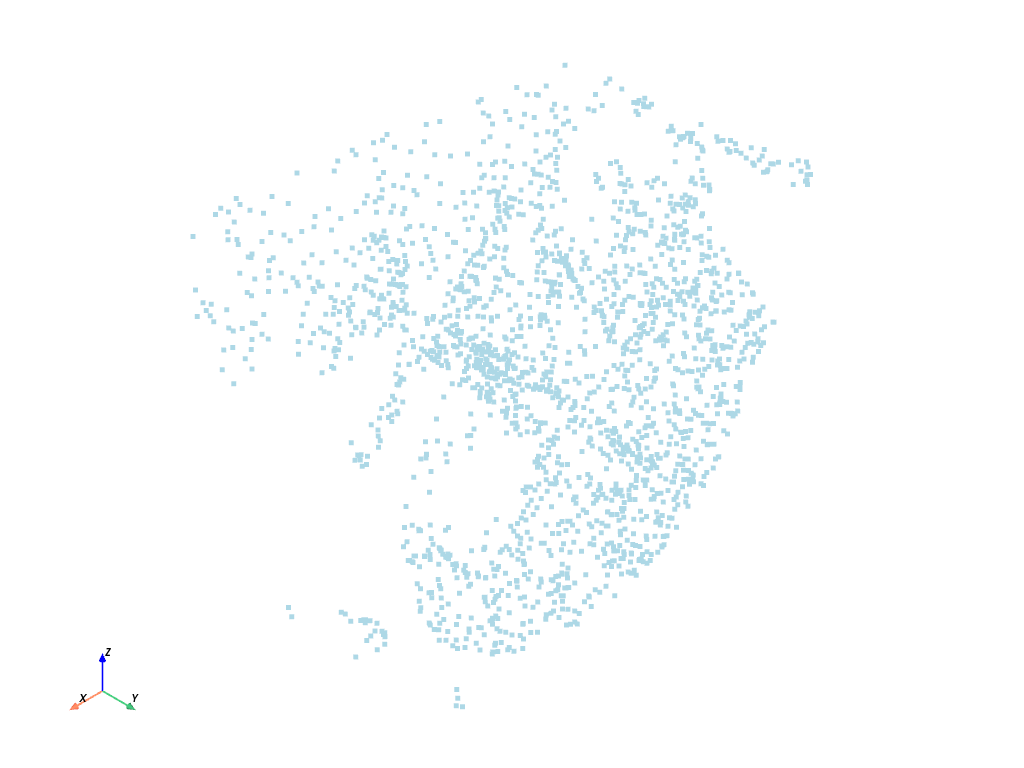

0 Label: desk, Points: (2048, 3)


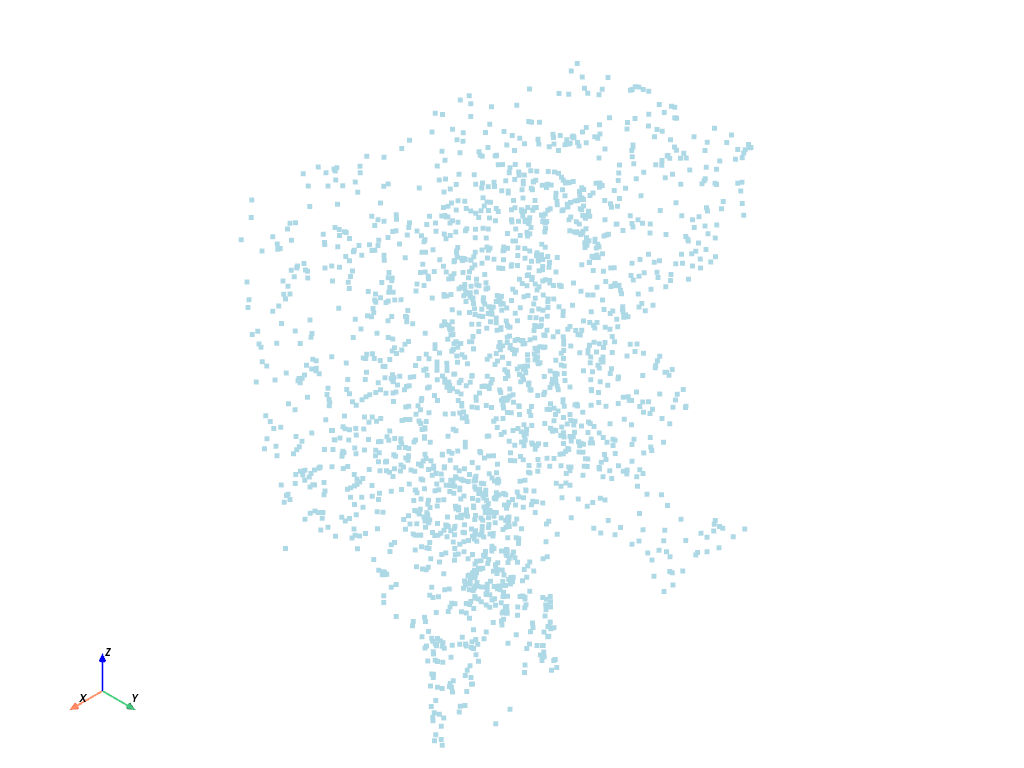

0 Label: desk, Points: (2048, 3)


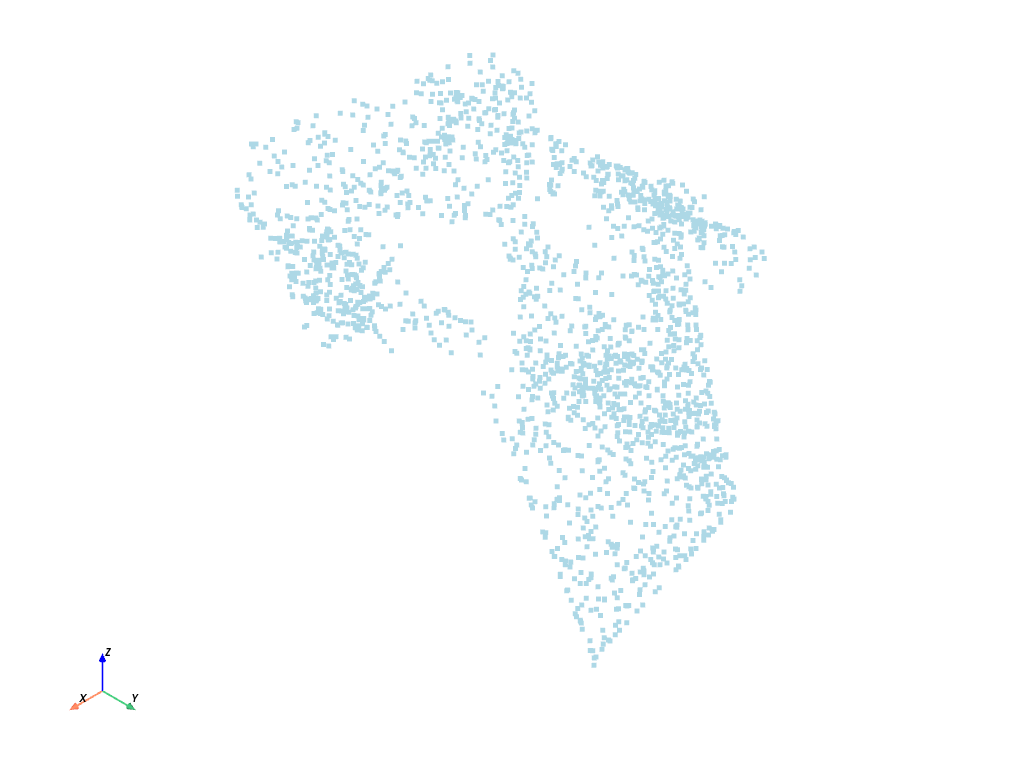

0 Label: desk, Points: (2048, 3)


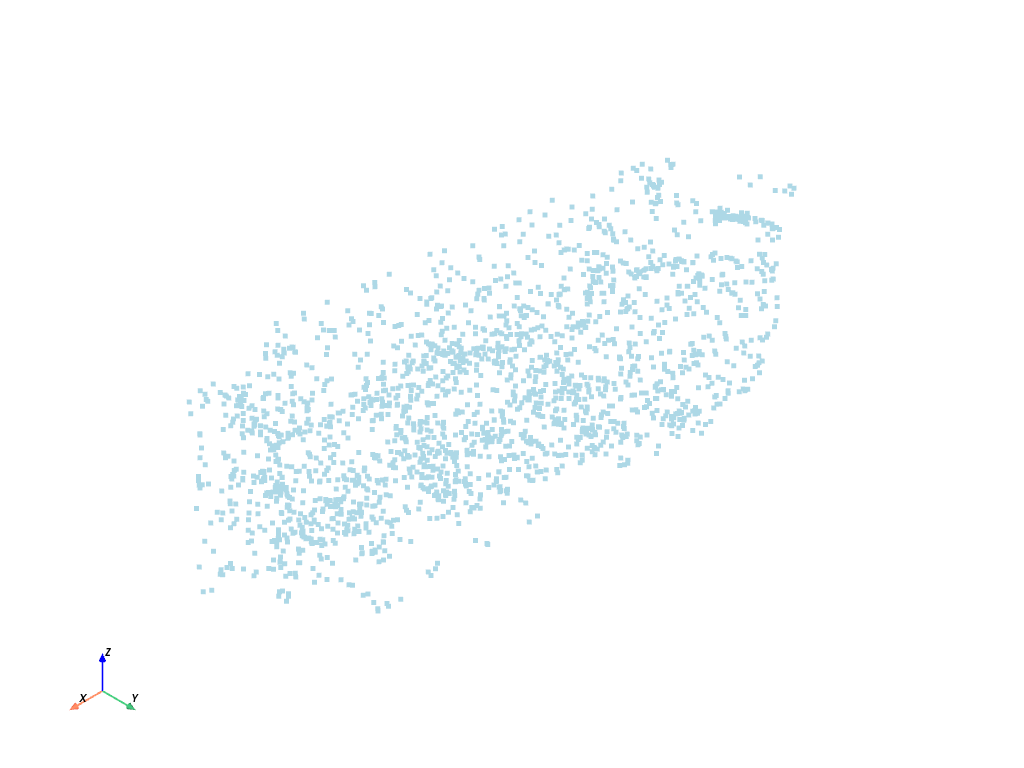

0 Label: bed, Points: (2048, 3)


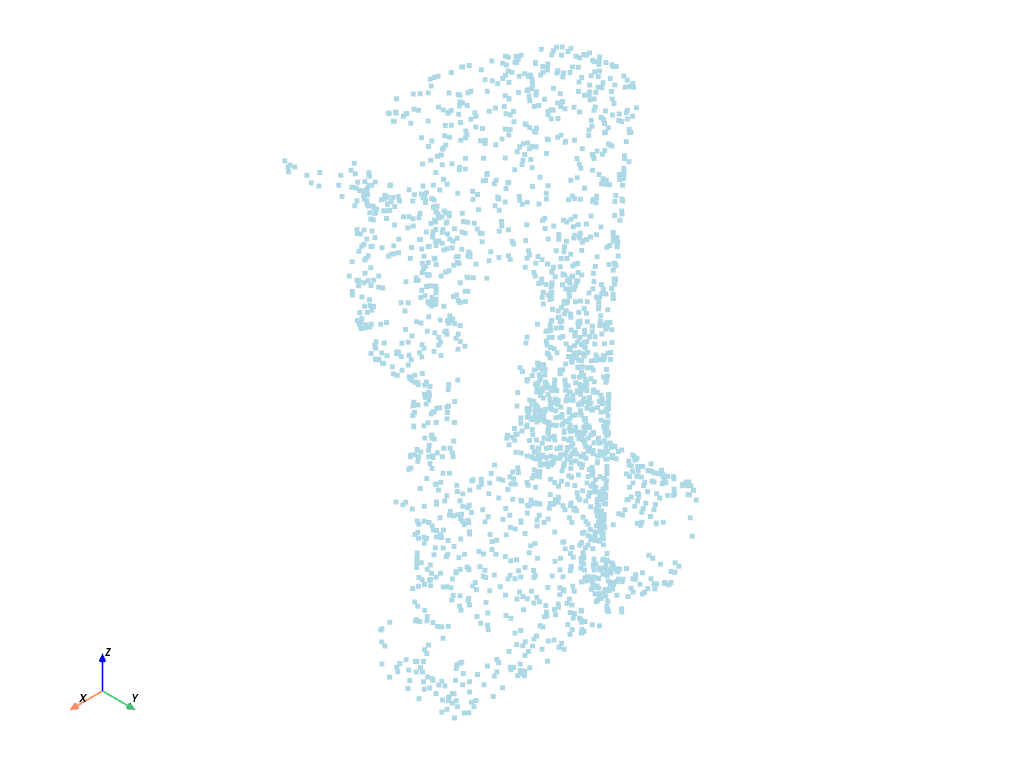

In [24]:
%cd /content/SemNov_AML_DAAI_23-24/

import numpy as np

from torch.cuda.amp import GradScaler, autocast
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.utils.data.distributed import DistributedSampler
from torch.utils.data import DataLoader
from torchvision import transforms

from datasets.modelnet import *
from datasets.scanobject import *
from classifiers.trainer_cla_md import *

import pyvista


def print_objects():
    print(f"Arguments: ")
    set_random_seed(1)

    train_data = ModelNet40_OOD(
        data_root='/content/3D_OS_release_data',
        train=True,
        num_points=2048,
        class_choice='SR1',
        transforms=None)

    print(f"SR1 train data len: {len(train_data)}")

    # test data (only clean samples)
    test_data = ModelNet40_OOD(
        data_root='/content/3D_OS_release_data',
        train=False,
        num_points=2048,
        class_choice='SR1',
        transforms=None)

    mn_loader = DataLoader(train_data, batch_size=64, num_workers=1,
                              worker_init_fn=init_np_seed, shuffle=True, drop_last=False)

    dataloader_config = {
        'batch_size': 64, 'drop_last': False, 'shuffle': True,
        'num_workers': 1, 'sampler': None, 'worker_init_fn': init_np_seed}

    # whole evaluation is done on ScanObject RW data
    sonn_args = {
        'data_root': '/content/3D_OS_release_data',
        'sonn_split': 'main_split',
        'h5_file': 'objectdataset.h5',
        'split': 'all',  # we use both training (unused) and test samples during evaluation
        'num_points': 2048,  # default: use all 2048 sonn points to avoid sampling randomicity
        'transforms': None,  # no augmentation applied at inference time
    }

    sr1_loader = DataLoader(ScanObject(class_choice="sonn_2_mdSet1", **sonn_args), **dataloader_config)
    sr2_loader = DataLoader(ScanObject(class_choice="sonn_2_mdSet2", **sonn_args), **dataloader_config)
    sr3_loader = []#DataLoader(ScanObject(class_choice="sonn_ood_common", **sonn_args), **dataloader_config)

    print('Load samples')
    loaders = {
        'MN': mn_loader,
        'SR1': sr1_loader,
        'SR2': sr2_loader,
        'SR3': sr3_loader
    }

    labels =  {
        'MN': ['chair', 'bookshelf', 'door', 'sink', 'sofa'],
        'SR1': ['chair', 'shelf', 'door', 'sink', 'sofa'],
        'SR2': ['bed', 'toilet', 'desk', 'display', 'table'],
        'SR3': ['bag', 'bin', 'box', 'cabinet', 'pillow']
    }

    select = 'SR2'

    loader = loaders[select]
    model_label = labels[select]

    count = 0

    for i, batch in enumerate(loader, 0):
        points, labels = batch[0], batch[1]
        for point, label in zip(points, labels):
            if count >= 10:
                return
            count += 1
            pt = to_numpy(point)
            print(f"{i} Label: {model_label[label]}, Points: {pt.shape}")
            pyvista.plot(pt)

print_objects()